In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
item_dic = {0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

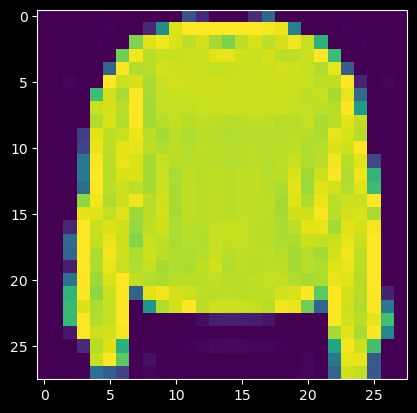

In [5]:
plt.style.use("dark_background")
plt.imshow(train_data[7])

In [6]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
# mnist_1= tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(10, activation = "relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

# mnist_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#                 metrics = ["accuracy"],
#                optimizer=tf.keras.optimizers.Adam())

# hist_1 = mnist_1.fit(train_data,
#                      train_labels,
#                      epochs = 30,
#                     validation_data = (test_data, test_labels))

# mnist_1.summary()

---------------------------------------------------

In [8]:
# Normalization
train_data_norm = train_data/255
test_data_norm = test_data/255
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [9]:
# mnist_2 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(10, activation = "relu"),
#     tf.keras.layers.Dense(100, activation = "relu"),
#     tf.keras.layers.Dense(10, activation = "softmax")
# ])

# mnist_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics="accuracy")

# hist_2 = mnist_2.fit(x=train_data_norm,
#                   y=train_labels,
#                   epochs = 30,
#                   validation_data=(test_data_norm, test_labels))

In [10]:
# pd.DataFrame(hist_1.history).plot()

In [11]:
# pd.DataFrame(hist_2.history).plot()

In [12]:
mnist_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

mnist_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "accuracy")

hist_3 = mnist_3.fit(train_data_norm,
           train_labels,
           epochs=40,
            validation_data=(test_data_norm, test_labels))


Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6734 - accuracy: 0.7661 - val_loss: 0.5322 - val_accuracy: 0.8119
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4778 - accuracy: 0.8351 - val_loss: 0.4843 - val_accuracy: 0.8306
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 0.4713 - val_accuracy: 0.8361
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4226 - accuracy: 0.8518 - val_loss: 0.4552 - val_accuracy: 0.8444
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4071 - accuracy: 0.8574 - val_loss: 0.4447 - val_accuracy: 0.8466
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8616 - val_loss: 0.4343 - val_accuracy: 0.8448
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8632 - val_loss: 0.4192 - val_accuracy:

<Axes: >

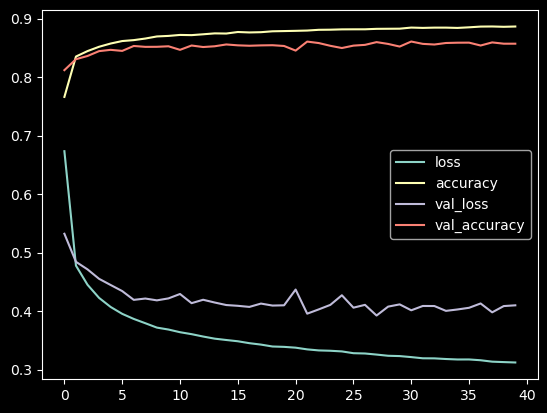

In [13]:
pd.DataFrame(hist_3.history).plot()

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_labels
y_pred = np.argmax(mnist_3.predict(test_data_norm), axis=1)
cr = classification_report(y_true, y_pred)
print(cr)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.71      0.75      1000
           3       0.90      0.81      0.85      1000
           4       0.71      0.85      0.77      1000
           5       0.96      0.92      0.94      1000
           6       0.66      0.64      0.65      1000
           7       0.91      0.95      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Axes: >

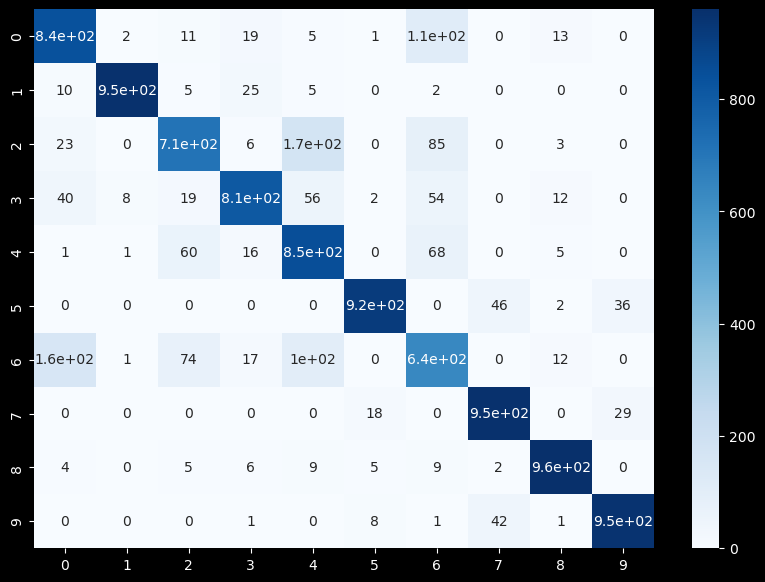

In [15]:
cm = confusion_matrix(y_true=y_true,
                     y_pred=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, cmap="Blues")

In [16]:
for i in range(0,9):
    print(f"{i} {item_dic[i]}")

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag


In [17]:
mnist_3.layers[1]

In [18]:
weights, biases = mnist_3.layers[1].get_weights()
weights, biases

(array([[ 0.14378127, -1.8146822 , -0.07693911, ..., -0.7363041 ,
          0.07589487, -0.00524773],
        [ 1.2714286 , -1.5310563 ,  2.2617128 , ..., -1.4657283 ,
          1.5976617 ,  0.00649636],
        [ 0.20710625, -1.5719212 , -0.604432  , ..., -1.2554501 ,
          0.5767031 , -0.7096131 ],
        ...,
        [-0.7522185 , -0.05192503, -0.7939897 , ...,  0.5387717 ,
         -0.18750238,  0.0029038 ],
        [-1.0527743 , -0.62992686, -0.51325536, ..., -0.5232105 ,
          1.1071985 ,  0.36151275],
        [-0.2816742 , -0.63355297,  0.2838993 , ..., -0.40448898,
          0.52113956, -0.8196151 ]], dtype=float32),
 array([0.35309178, 1.3467634 , 0.16524269, 0.03492521, 0.31881663,
        1.4808168 , 0.3427065 , 1.1334718 , 1.2749884 , 0.675567  ],
       dtype=float32))

In [19]:
mnist_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


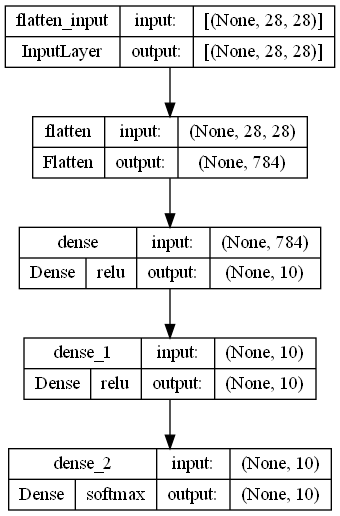

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(mnist_3,show_shapes=True, show_layer_activations=True)